In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
import torchvision.transforms.functional as F

In [2]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.io import read_image
weights=ResNet50_Weights.IMAGENET1K_V1
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
img1 = read_image('i1.jpg')
img2 = read_image('i2.jpg')
img3 = read_image('i3.jpg')
img4 = read_image('i4.jpg')
img5 = read_image('i5.jpg')


In [4]:
ReLU = lambda Z : torch.maximum(Z,torch.zeros_like(Z))


preprocess = weights.transforms()
batch1 = preprocess(img1).unsqueeze(0)
batch2 = preprocess(img2).unsqueeze(0)
batch3 = preprocess(img3).unsqueeze(0)
batch4 = preprocess(img4).unsqueeze(0)
batch5 = preprocess(img5).unsqueeze(0)

prediction_1 = model(batch1).softmax(1)
class_id_1 = prediction_1.argmax()
score_1 = prediction_1[0][class_id_1].item()

prediction_2 = model(batch2).softmax(1)
class_id_2 = prediction_2.argmax()
score_2 = prediction_2[0][class_id_2].item()

prediction_3 = model(batch3).softmax(1)
class_id_3 = prediction_3.argmax()
score_3 = prediction_3[0][class_id_3].item()

prediction_4 = model(batch4).softmax(1)
class_id_4 = prediction_4.argmax()
score_4 = prediction_4[0][class_id_4].item()

prediction_5 = model(batch5).softmax(1)
class_id_5 = prediction_5.argmax()
score_5 = prediction_5[0][class_id_5].item()

argscore = torch.tensor([class_id_1,class_id_2,class_id_3,class_id_4,class_id_5])
maxscore = torch.tensor([score_1,score_2,score_3,score_4,score_5])
argscore,maxscore

(tensor([235,  65, 822, 851, 282]),
 tensor([0.5792, 0.4450, 0.9953, 0.1701, 0.6839]))

In [5]:
from torch import nn
m = nn.LogSoftmax(dim=1)
class mymodel(nn.Module):
    def __init__(self,label,image):
        super().__init__()
        image1 = torch.clone(image)
        self.img = nn.Parameter(image1)
        self.beta = nn.Parameter(torch.rand(1,requires_grad=True,dtype = torch.float)/1e6)
        self.label = label
    def forward(self,model):
        prediction = (model(self.img))
        norm = torch.norm(self.img.reshape(-1,))
        return m(prediction - self.beta*norm)
    
class mymodel2(nn.Module):
    def __init__(self,label,image):
        super().__init__()
        image1 = torch.clone(image)
        self.img = nn.Parameter((image1))
        self.img = self.img
        self.beta = nn.Parameter(torch.rand(1,requires_grad=True,dtype = torch.float)/1e6)
        self.label = label
    def forward(self,model):
        prediction = (model(ReLU(self.img)))
        norm = torch.norm(self.img.reshape(-1,))
        return m(prediction - self.beta*norm)
    
class gradmodel(nn.Module):
    def __init__(self,label,image):
        super().__init__()
        image1 = torch.clone(image)
        output = gap_input(image1)
        self.img = nn.Parameter((output))
        self.label = label
    def forward(self,model):
        pool_layer = model.avgpool
        fc_layer = model.fc
        prediction = fc_layer(pool_layer(ReLU(self.img)).reshape(1,-1))
        return m(prediction)

In [6]:
def create_model():
    model_1 = mymodel(235,batch1)
    model_2 = mymodel(65,batch2)
    model_3 = mymodel(822,batch3)
    model_4 = mymodel(851,batch4)
    model_5 = mymodel(282,batch5)
    return model_1,model_2,model_3,model_4,model_5
def create_model2():
    model_1 = mymodel2(235,batch1)
    model_2 = mymodel2(65,batch2)
    model_3 = mymodel2(822,batch3)
    model_4 = mymodel2(851,batch4)
    model_5 = mymodel2(282,batch5)
    return model_1,model_2,model_3,model_4,model_5
def create_gradmodel():
    model_1 = gradmodel(235,batch1)
    model_2 = gradmodel(65,batch2)
    model_3 = gradmodel(822,batch3)
    model_4 = gradmodel(851,batch4)
    model_5 = gradmodel(282,batch5)
    return model_1,model_2,model_3,model_4,model_5

In [7]:
def convert_to_grayscale(im_as_arr):
    """
        Converts 3d image to grayscale
    Args:
        im_as_arr (numpy arr): RGB image with shape (D,W,H)
    returns:
        grayscale_im (numpy_arr): Grayscale image with shape (1,W,D)
    """
    grayscale_im = np.sum(np.abs(im_as_arr), axis=0)
    im_max = np.percentile(grayscale_im, 99)
    im_min = np.min(grayscale_im)
    grayscale_im = (np.clip((grayscale_im - im_min) / (im_max - im_min), 0, 1))
    grayscale_im = np.expand_dims(grayscale_im, axis=0)
    return grayscale_im

In [8]:
def SGD_backprop(model_0,label):
    loss_fn = nn.NLLLoss()
    optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.05)
    epochs = 50
    for epoch in range(epochs):
        model_0.train()
        y_pred = model_0(model)
        loss = loss_fn(y_pred,torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("epoch: ",epoch,loss)


def guided_backprop(model_0,label):
    loss_fn = nn.NLLLoss()
    optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.05)
    epochs = 50
    for epoch in range(epochs):
        model_0.train()
        y_pred = model_0(model)
        loss = loss_fn(y_pred,torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        model_0.img.grad = ReLU(model_0.img.grad)
        model_0.beta.grad = ReLU(model_0.beta.grad)
        optimizer.step()
#         print(loss)

a = list(model.children())
weight = a[9].weight
def gap_input(img):
    '''
    Input: 
        path_img: string, /path/to/image
        model: a pretrained torch model
    Output:
        my_output: torch.tensor, output of avgpool layer
    '''
    with torch.no_grad():
        my_output = None
        
        def my_hook(module_, input_, output_):
            nonlocal my_output
            my_output = output_

        a_hook = model.layer4.register_forward_hook(my_hook)        
        model(img)
        a_hook.remove()
        return my_output
def cam(model_0,label):
    output = gap_input(model_0.img)
    output = output[0].permute(1,2,0)
    for i in range(2048):
        output[:,:,i] = output[:,:,i]*weight[label][i]

    output = torch.sum(output,axis =2)
    output = output.unsqueeze(0)
    new_output = F.resize(output, size=(224, 224))
    new_output = new_output.permute(1,2,0).detach().numpy()
    return new_output

def guided_cam(model_6):
    loss_fn = nn.NLLLoss()
    optimizer = torch.optim.SGD(params = model_6.parameters(),lr = 0.05,momentum = 0.9 )
    epochs = 200
    for epoch in range(epochs):
        model_6.train()
        y_pred = model_6(model)
        loss = loss_fn(y_pred,torch.tensor([model_6.label]))
        optimizer.zero_grad()
        loss.backward()
        model_6.img.grad = ReLU(model_6.img.grad)
        optimizer.step()

def resize_to_img(model_6,batch6):
    output = ReLU(1*(model_6.img))
    output = output[0].permute(1,2,0)*100
    output = output.detach()
    for i in range(2048):
        output[:,:,i] = output[:,:,i]*weight[model_6.label][i]

    output = torch.sum(output,axis =2)
    output = output.unsqueeze(0)
    new_output = F.resize(output, size=(224, 224))
    new_output = new_output.permute(1,2,0).detach().numpy()
    return new_output

In [9]:
def cal_score(img_0):
    img_0 = torch.tensor(img_0.clone().detach())
    img_0 = img_0.permute(2,0,1)
    batch = img_0.unsqueeze(0)
    predict = model(batch).softmax(1)
#     print(predict)
    class_id = predict.argmax()
    score = predict[0][class_id].item()
    return score,class_id

In [ ]:
model_1,model_2,model_3,model_4,model_5 = create_model()
SGD_backprop(model_1,argscore[0])
img_1 = model_1.img[0].permute(1,2,0)
score_1,class_id_1 = cal_score(img_1)
img_1 = img_1 - batch1[0].permute(1,2,0)
img_1 = img_1.detach().numpy()

SGD_backprop(model_2,argscore[1])
img_2 = model_2.img[0].permute(1,2,0)
score_2,class_id_2 = cal_score(img_2)
img_2 = img_2 - batch2[0].permute(1,2,0)
img_2 = img_2.detach().numpy()

SGD_backprop(model_3,argscore[2])
img_3 = model_3.img[0].permute(1,2,0)
score_3,class_id_3 = cal_score(img_3)
img_3 = img_3 - batch3[0].permute(1,2,0)
img_3 = img_3.detach().numpy()

SGD_backprop(model_4,argscore[3])
img_4 = model_4.img[0].permute(1,2,0)
score_4,class_id_4 = cal_score(img_4)
img_4 = img_4 - batch4[0].permute(1,2,0)
img_4 = img_4.detach().numpy()

SGD_backprop(model_5,argscore[4])
img_5 = model_5.img[0].permute(1,2,0)
score_5,class_id_5 = cal_score(img_5)
img_5 = img_5 - batch5[0].permute(1,2,0)
img_5 = img_5.detach().numpy()

argscore = torch.tensor([class_id_1,class_id_2,class_id_3,class_id_4,class_id_5])
maxscore = torch.tensor([score_1,score_2,score_3,score_4,score_5])
argscore,maxscore

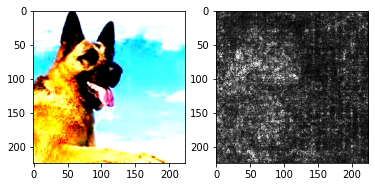

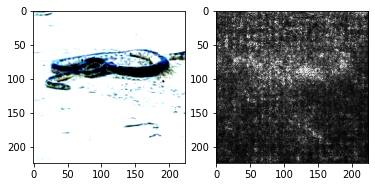

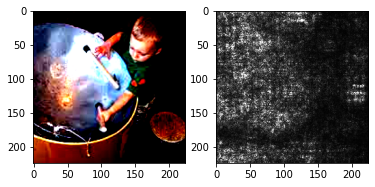

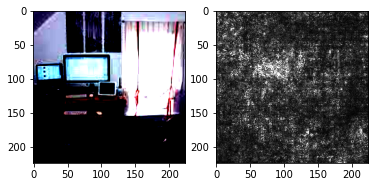

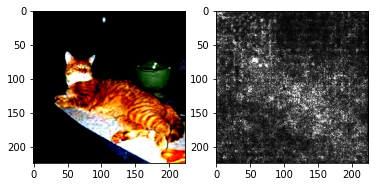

In [11]:
img_1 = img_1*100
img_1 = convert_to_grayscale(img_1.transpose(2,0,1))
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch1[0].permute(1,2,0))
ax1[1].imshow(img_1.transpose(1,2,0),cmap = 'gray')

img_2 = img_2*100
img_2 = convert_to_grayscale(img_2.transpose(2,0,1))
fig2,ax2 = plt.subplots(1,2)
ax2[0].imshow(batch2[0].permute(1,2,0))
ax2[1].imshow(img_2.transpose(1,2,0),cmap = 'gray')

img_3 = img_3*100
img_3 = convert_to_grayscale(img_3.transpose(2,0,1))
fig3,ax3 = plt.subplots(1,2)
ax3[0].imshow(batch3[0].permute(1,2,0))
ax3[1].imshow(img_3.transpose(1,2,0),cmap = 'gray')

img_4 = img_4*100
img_4 = convert_to_grayscale(img_4.transpose(2,0,1))
fig4,ax4 = plt.subplots(1,2)
ax4[0].imshow(batch4[0].permute(1,2,0))
ax4[1].imshow(img_4.transpose(1,2,0),cmap = 'gray')

img_5 = img_5*100
img_5 = convert_to_grayscale(img_5.transpose(2,0,1))
fig5,ax5 = plt.subplots(1,2)
ax5[0].imshow(batch5[0].permute(1,2,0))
ax5[1].imshow(img_5.transpose(1,2,0),cmap = 'gray')

In [12]:
model_1,model_2,model_3,model_4,model_5 = create_model2()
guided_backprop(model_1,argscore[0])
img_1 = model_1.img[0].permute(1,2,0)
score_1,class_id_1 = cal_score(img_1)
img_1 = img_1 - batch1[0].permute(1,2,0)
img_1 = img_1.detach().numpy()

guided_backprop(model_2,argscore[1])
img_2 = model_2.img[0].permute(1,2,0)
score_2,class_id_2 = cal_score(img_2)
img_2 = img_2 - batch2[0].permute(1,2,0)
img_2 = img_2.detach().numpy()

guided_backprop(model_3,argscore[2])
img_3 = model_3.img[0].permute(1,2,0)
score_3,class_id_3 = cal_score(img_3)
img_3 = img_3 - batch3[0].permute(1,2,0)
img_3 = img_3.detach().numpy()

guided_backprop(model_4,argscore[3])
img_4 = model_4.img[0].permute(1,2,0)
score_4,class_id_4 = cal_score(img_4)
img_4 = img_4 - batch4[0].permute(1,2,0)
img_4 = img_4.detach().numpy()

guided_backprop(model_5,argscore[4])
img_5 = model_5.img[0].permute(1,2,0)
score_5,class_id_5 = cal_score(img_5)
img_5 = img_5 - batch5[0].permute(1,2,0)
img_5 = img_5.detach().numpy()

argscore = torch.tensor([class_id_1,class_id_2,class_id_3,class_id_4,class_id_5])
maxscore = torch.tensor([score_1,score_2,score_3,score_4,score_5])
argscore,maxscore


<ipython-input-9-79f4bc724141>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_0 = torch.tensor(img_0.clone().detach())


(tensor([235,  65, 822, 851, 282]),
 tensor([0.6224, 0.7066, 0.9958, 0.3504, 0.7131]))

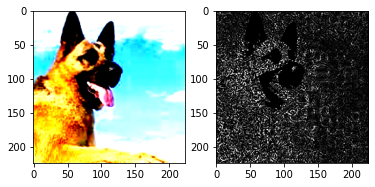

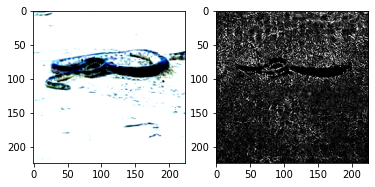

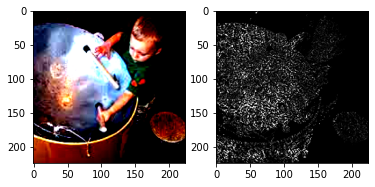

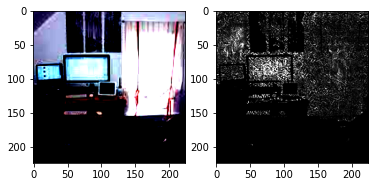

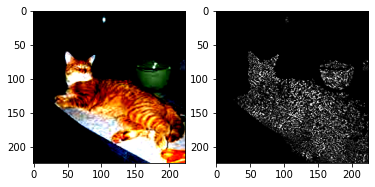

In [13]:
img_1 = img_1*100
img_1 = convert_to_grayscale(img_1.transpose(2,0,1))
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch1[0].permute(1,2,0))
ax1[1].imshow(img_1.transpose(1,2,0),cmap = 'gray')

img_2 = img_2*100
img_2 = convert_to_grayscale(img_2.transpose(2,0,1))
fig2,ax2 = plt.subplots(1,2)
ax2[0].imshow(batch2[0].permute(1,2,0))
ax2[1].imshow(img_2.transpose(1,2,0),cmap = 'gray')

img_3 = img_3*100
img_3 = convert_to_grayscale(img_3.transpose(2,0,1))
fig3,ax3 = plt.subplots(1,2)
ax3[0].imshow(batch3[0].permute(1,2,0))
ax3[1].imshow(img_3.transpose(1,2,0),cmap = 'gray')

img_4 = img_4*100
img_4 = convert_to_grayscale(img_4.transpose(2,0,1))
fig4,ax4 = plt.subplots(1,2)
ax4[0].imshow(batch4[0].permute(1,2,0))
ax4[1].imshow(img_4.transpose(1,2,0),cmap = 'gray')

img_5 = img_5*100
img_5 = convert_to_grayscale(img_5.transpose(2,0,1))
fig5,ax5 = plt.subplots(1,2)
ax5[0].imshow(batch5[0].permute(1,2,0))
ax5[1].imshow(img_5.transpose(1,2,0),cmap = 'gray')

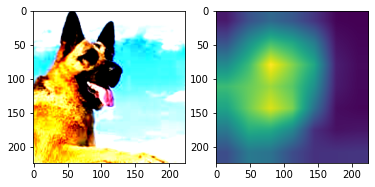

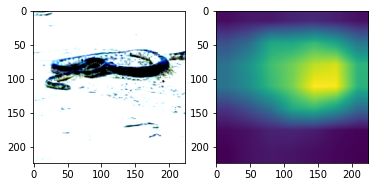

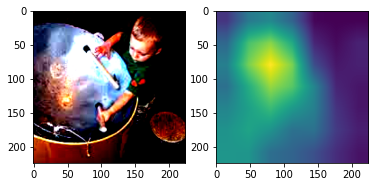

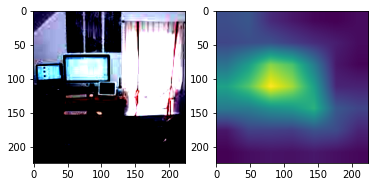

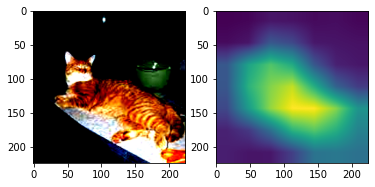

In [14]:
model_1,model_2,model_3,model_4,model_5 = create_model()
img_1 = cam(model_1,argscore[0])
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch1[0].permute(1,2,0))
ax1[1].imshow(img_1)

img_2 = cam(model_2,argscore[1])
fig2,ax2 = plt.subplots(1,2)
ax2[0].imshow(batch2[0].permute(1,2,0))
ax2[1].imshow(img_2)

img_3 = cam(model_3,argscore[2])
fig3,ax3 = plt.subplots(1,2)
ax3[0].imshow(batch3[0].permute(1,2,0))
ax3[1].imshow(img_3)

img_4 = cam(model_4,argscore[3])
fig4,ax4 = plt.subplots(1,2)
ax4[0].imshow(batch4[0].permute(1,2,0))
ax4[1].imshow(img_4)

img_5 = cam(model_5,argscore[4])
fig5,ax5 = plt.subplots(1,2)
ax5[0].imshow(batch5[0].permute(1,2,0))
ax5[1].imshow(img_5)

In [15]:
children_counter = 0
for n,c in model.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",n,)
    children_counter+=1

Children Counter:  0  Layer Name:  conv1
Children Counter:  1  Layer Name:  bn1
Children Counter:  2  Layer Name:  relu
Children Counter:  3  Layer Name:  maxpool
Children Counter:  4  Layer Name:  layer1
Children Counter:  5  Layer Name:  layer2
Children Counter:  6  Layer Name:  layer3
Children Counter:  7  Layer Name:  layer4
Children Counter:  8  Layer Name:  avgpool
Children Counter:  9  Layer Name:  fc


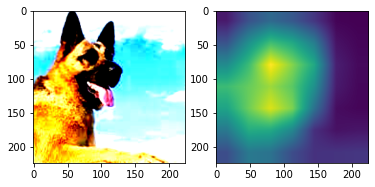

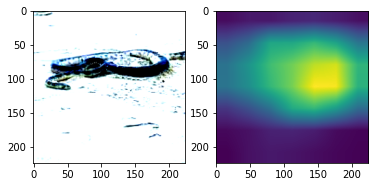

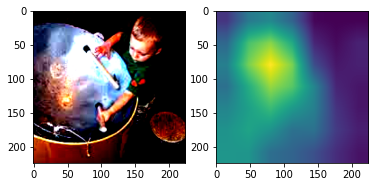

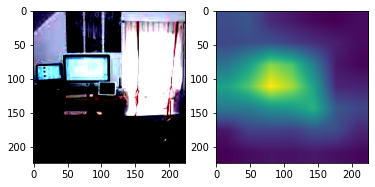

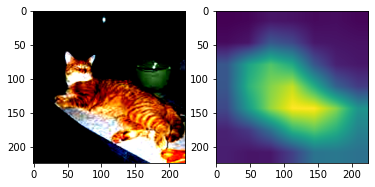

In [16]:
model_1,model_2,model_3,model_4,model_5 = create_gradmodel()
guided_cam(model_1)
img_1 = resize_to_img(model_1,batch1)
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch1[0].permute(1,2,0))
ax1[1].imshow(img_1)

guided_cam(model_2)
img_2 = resize_to_img(model_2,batch2)
fig2,ax2 = plt.subplots(1,2)
ax2[0].imshow(batch2[0].permute(1,2,0))
ax2[1].imshow(img_2)

guided_cam(model_3)
img_3 = resize_to_img(model_3,batch3)
fig3,ax3 = plt.subplots(1,2)
ax3[0].imshow(batch3[0].permute(1,2,0))
ax3[1].imshow(img_3)

guided_cam(model_4)
img_4 = resize_to_img(model_4,batch4)
fig4,ax4 = plt.subplots(1,2)
ax4[0].imshow(batch4[0].permute(1,2,0))
ax4[1].imshow(img_4)

guided_cam(model_5)
img_5 = resize_to_img(model_5,batch5)
fig5,ax5 = plt.subplots(1,2)
ax5[0].imshow(batch5[0].permute(1,2,0))
ax5[1].imshow(img_5)